# Drills

Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:

Choose one variable and plot that variable four different ways.

Choose two continuous variables, and plot them three different ways.

Choose one continuous variable and one categorical variable, and plot them six different ways.

Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

#Datasets originally downloaded from AirBnB, stored in separate folder that is not linked to GitHub (space limits)
df = pd.read_csv('~/thinkful_mac/thinkful_large_files/listings_summ.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18461891,"Bright, comfortable 1B studio near everything!",916092,Connie Mae,Queens,Ditmars Steinway,40.774142,-73.916246,Entire home/apt,110,6,0,NaN,NaN,1,0
1,20702398,Quiet house on City Island,1457680,James,Bronx,City Island,40.849191,-73.786509,Private room,50,1,2,2017-10-01,2.00,1,169
2,6627449,Large 1 BDRM in Great location,13886510,Arlene,Bronx,City Island,40.849775,-73.786609,Entire home/apt,125,3,21,2017-09-26,0.77,1,363
3,19949243,Stay aboard a sailboat,1149260,MoMo,Bronx,City Island,40.848838,-73.782276,Entire home/apt,100,3,0,NaN,NaN,1,90
4,1886820,Quaint City Island Community.,9815788,Steve,Bronx,City Island,40.841144,-73.783052,Entire home/apt,300,7,0,NaN,NaN,1,365


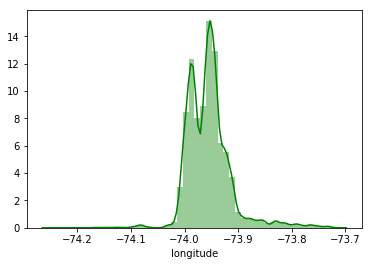

In [4]:
#Continuous variable PLOT 1
sns.distplot(df['longitude'], color = 'g')
plt.show()

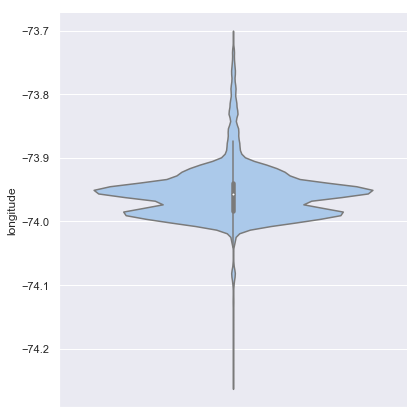

In [5]:
#Continuous variable PLOT 2
sns.set(style = 'darkgrid')
g = sns.catplot(y="longitude", data=df,
                   height=6, kind="violin", palette="pastel")
plt.show()

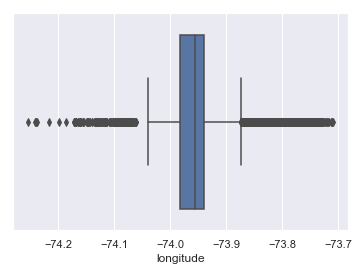

In [8]:
#Continuous variable PLOT 3
sns.boxplot(x = df['longitude'])
plt.show()

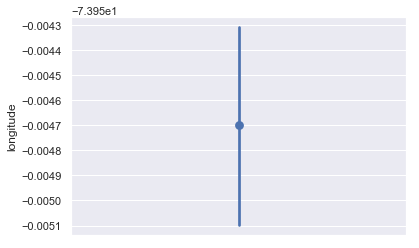

In [10]:
#Continuous variable PLOT 4
sns.pointplot(x= 'longitude', data = df, orient = 'v')
plt.show()

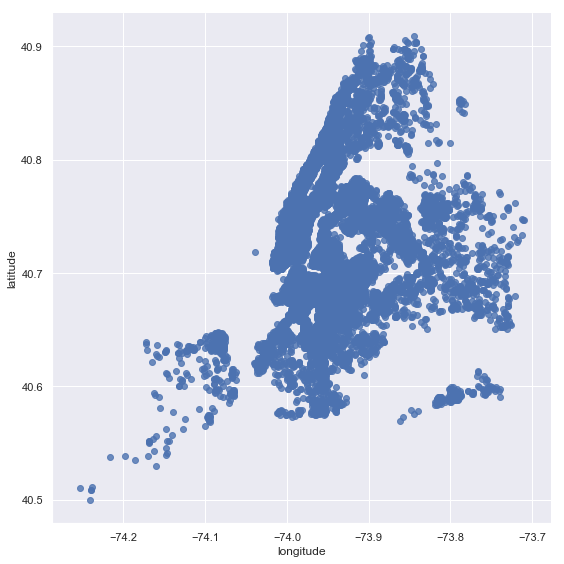

In [12]:
#Two Continuous variables PLOT 1
sns.lmplot("longitude", "latitude", data = df, fit_reg = False, palette = 'pastel', height = 8)
plt.show()

/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


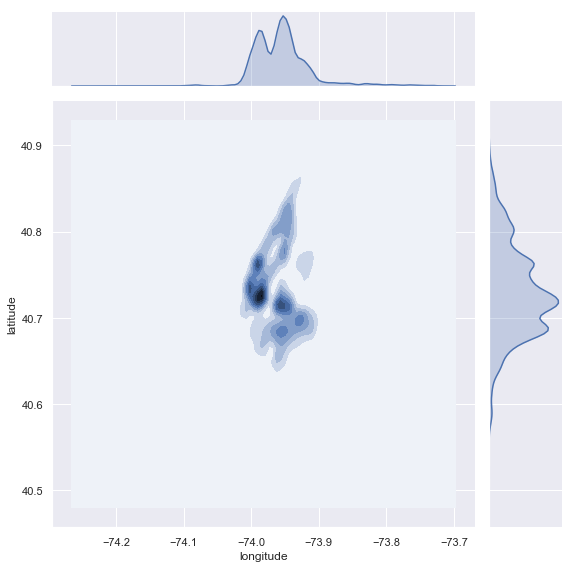

In [23]:
#Two Continuous variables PLOT 2
sns.jointplot(x="longitude", y="latitude", data=df, kind="kde", size = 8)

/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


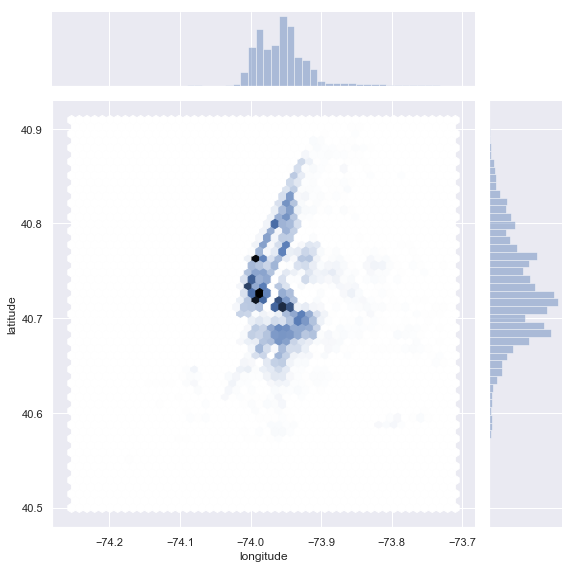

In [24]:
#Two Continuous variables PLOT 3
sns.jointplot(x="longitude", y="latitude", data=df, kind="hex", size = 8)

/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


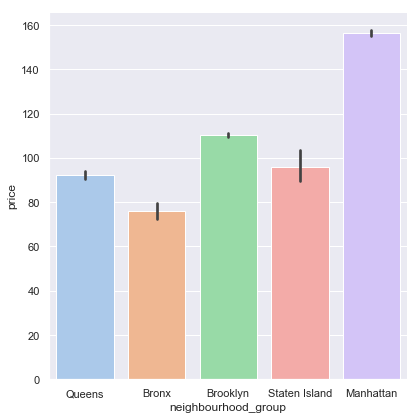

In [36]:
#One continuous variable and one categorical variable PLOT 1
sns.set(style = 'darkgrid')
g = sns.factorplot(x="neighbourhood_group", y="price", data=df.loc[lambda df: df['price'] < 500][:],
                   size=6, kind="bar", palette="pastel",ci=95)
plt.show()

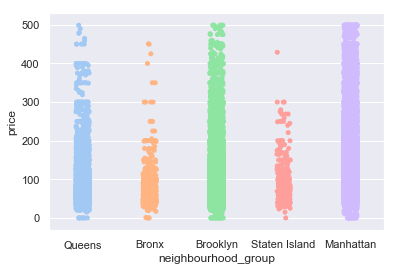

In [34]:
#One continuous variable and one categorical variable PLOT 2
sns.stripplot(x="neighbourhood_group", y="price", data=df.loc[lambda df: df['price'] < 500][:], jitter=True, palette = 'pastel')

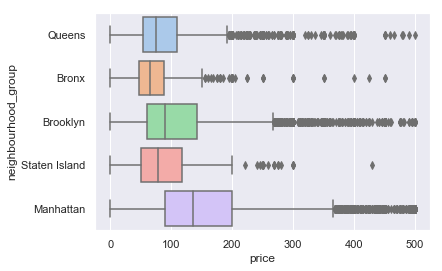

In [37]:
#One continuous variable and one categorical variable PLOT 3
sns.boxplot(x="price", y="neighbourhood_group", data=df[lambda df: df['price'] < 500], palette = 'pastel')

/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


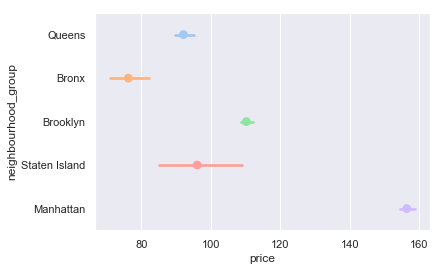

In [41]:
#One continuous variable and one categorical variable PLOT 4
sns.pointplot(x="price", y="neighbourhood_group", data=df[lambda df: df['price'] < 500], palette = 'pastel', ci = 99.99)

/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


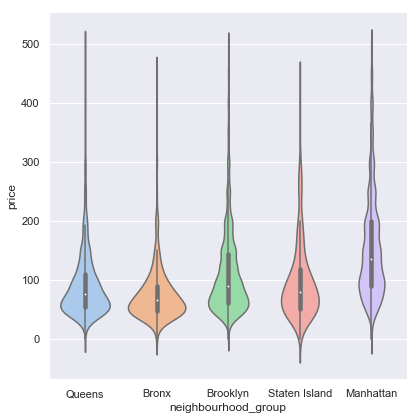

In [42]:
#One continuous variable and one categorical variable PLOT 5
sns.set(style = 'darkgrid')
g = sns.factorplot(y="price", x="neighbourhood_group", data=df[lambda df: df['price'] < 500],
                   size=6, kind="violin", palette="pastel")
plt.show()

/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


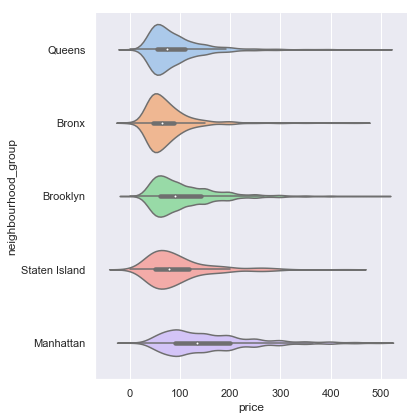

In [43]:
#One continuous variable and one categorical variable PLOT 6
sns.set(style = 'darkgrid')
g = sns.factorplot(x="price", y="neighbourhood_group", data=df[lambda df: df['price'] < 500],
                   size=6, kind="violin", palette="pastel")
plt.show()

# Challenge 

As an optional challenge, find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:

Probability distributions

Bivariate relationships

Whether the distributions or the relationships vary across groups

In [31]:
df2 = df.loc[lambda df: df['price'] < 500][['neighbourhood_group', 'price', 'number_of_reviews', 'reviews_per_month', 'availability_365']]

/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/ryanmitchell/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


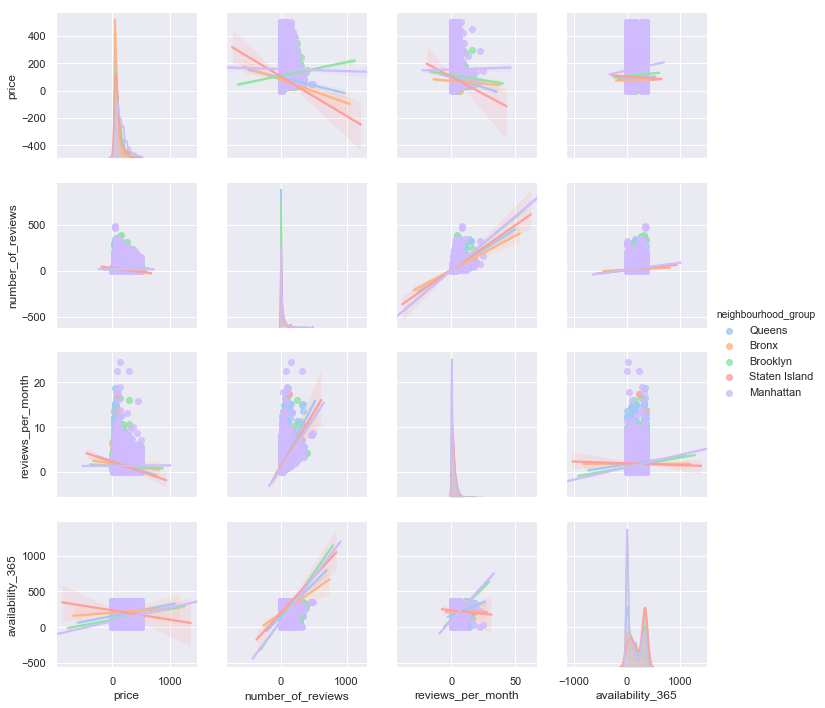

In [32]:
g = sns.pairplot(df2, hue = 'neighbourhood_group', diag_kind="kde", kind = 'reg', palette = 'pastel')